In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Coursework/ENPM703/assignment1'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-38a6652395a2>", line 18, in <cell line: 18>
    get_ipython().run_line_magic('cd', 'drive/My\\ Drive/$FOLDERNAME/cs231n/datasets/')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.
  

In [23]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: '%k,v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Affine layer: forward
Open the file `cs231n/layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [25]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769848888397517e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [26]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [27]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [28]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


## Inline Question 1:

We've only asked you to implement ReLU, but there are a number of different activation functions that one could use in neural networks, each with its pros and cons. In particular, an issue commonly seen with activation functions is getting zero (or close to zero) gradient flow during backpropagation. Which of the following activation functions have this problem? If you consider these functions in the one dimensional case, what types of input would lead to this behaviour?
1. Sigmoid
2. ReLU
3. Leaky ReLU

## Answer:
The vanishing gradient problem arises during backpropagation when gradient flow is close to zero.

1. The sigmoid function has a vanishing gradient problem, meaning that for very large positive and negative input values (in the tail regions of the curve), the gradient is almost zero. Saturation can occur in one dimension when very large positive and negative numbers, such as [-1e3, 1e3], are considered.

2. ReLU's linear response to a positive input makes it less susceptible to the vanishing gradient problem, which is one of its main advantages over Sigmoid. The gradient of ReLU is either 1 for positive inputs or 0 for negative inputs. The vanishing gradient problem may affect ReLU in the unlikely event that all of the input values are negative. Certain neurons are unable to learn more after this. The term "dying ReLU problem" refers to this. One way to approach the vanishing gradient problem in one dimension is to focus solely on negative numbers, such as [-1, -2, -3].

3. Leaky ReLU applies a slight negative slope for negative values, i.e., if x < 0 then 0.01x else x, in an attempt to overcome the ReLU problem of "dead" neurons. Thus, the goal of Leaky ReLU is to resolve the vanishing gradient issue. The gradient at x = 0 is undefined, though, because the max(0.01x, x) function is not continuous at that point. Therefore, if it is not explicitly handled in code, considering all zero values, such as [0, 0, 0], is a one-dimensional example that can result in zero gradients and can only occur due to a poor network setup.






# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `cs231n/layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [29]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


# Loss layers: Softmax and SVM
Now implement the loss and gradient for softmax and SVM in the `softmax_loss` and `svm_loss` function in `cs231n/layers.py`. These should be similar to what you implemented in `cs231n/classifiers/softmax.py` and `cs231n/classifiers/linear_svm.py`.

You can make sure that the implementations are correct by running the following:

In [30]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be around the order of e-9
print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.999602749096233
dx error:  1.4021566006651672e-09

Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


# Two-layer network
Open the file `cs231n/classifiers/fc_net.py` and complete the implementation of the `TwoLayerNet` class. Read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [31]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 1.22e-08
W2 relative error: 3.28e-10
b1 relative error: 8.37e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.56e-08
b2 relative error: 7.76e-10


# Solver
Open the file `cs231n/solver.py` and read through it to familiarize yourself with the API. You also need to imeplement the `sgd` function in `cs231n/optim.py`. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves about `36%` accuracy on the validation set.

In [32]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves about 36% #
# accuracy on the validation set.                                            #
##############################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# pass
# Initialize and train the Solver with the specified model, data, and training parameters
solver = Solver(model, data, update_rule="sgd",
                optim_config={"learning_rate": 1e-4}, lr_decay=0.95,
                batch_size=230, print_every=100, num_epochs=5)
solver.train()


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 1065) loss: 2.301819
(Epoch 0 / 5) train acc: 0.148000; val_acc: 0.140000
(Iteration 101 / 1065) loss: 2.256008
(Iteration 201 / 1065) loss: 2.124213
(Epoch 1 / 5) train acc: 0.247000; val_acc: 0.241000
(Iteration 301 / 1065) loss: 2.105422
(Iteration 401 / 1065) loss: 2.020780
(Epoch 2 / 5) train acc: 0.278000; val_acc: 0.292000
(Iteration 501 / 1065) loss: 1.916513
(Iteration 601 / 1065) loss: 1.938223
(Epoch 3 / 5) train acc: 0.324000; val_acc: 0.316000
(Iteration 701 / 1065) loss: 1.908146
(Iteration 801 / 1065) loss: 1.879034
(Epoch 4 / 5) train acc: 0.342000; val_acc: 0.331000
(Iteration 901 / 1065) loss: 1.810761
(Iteration 1001 / 1065) loss: 1.765554
(Epoch 5 / 5) train acc: 0.341000; val_acc: 0.358000


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.36 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

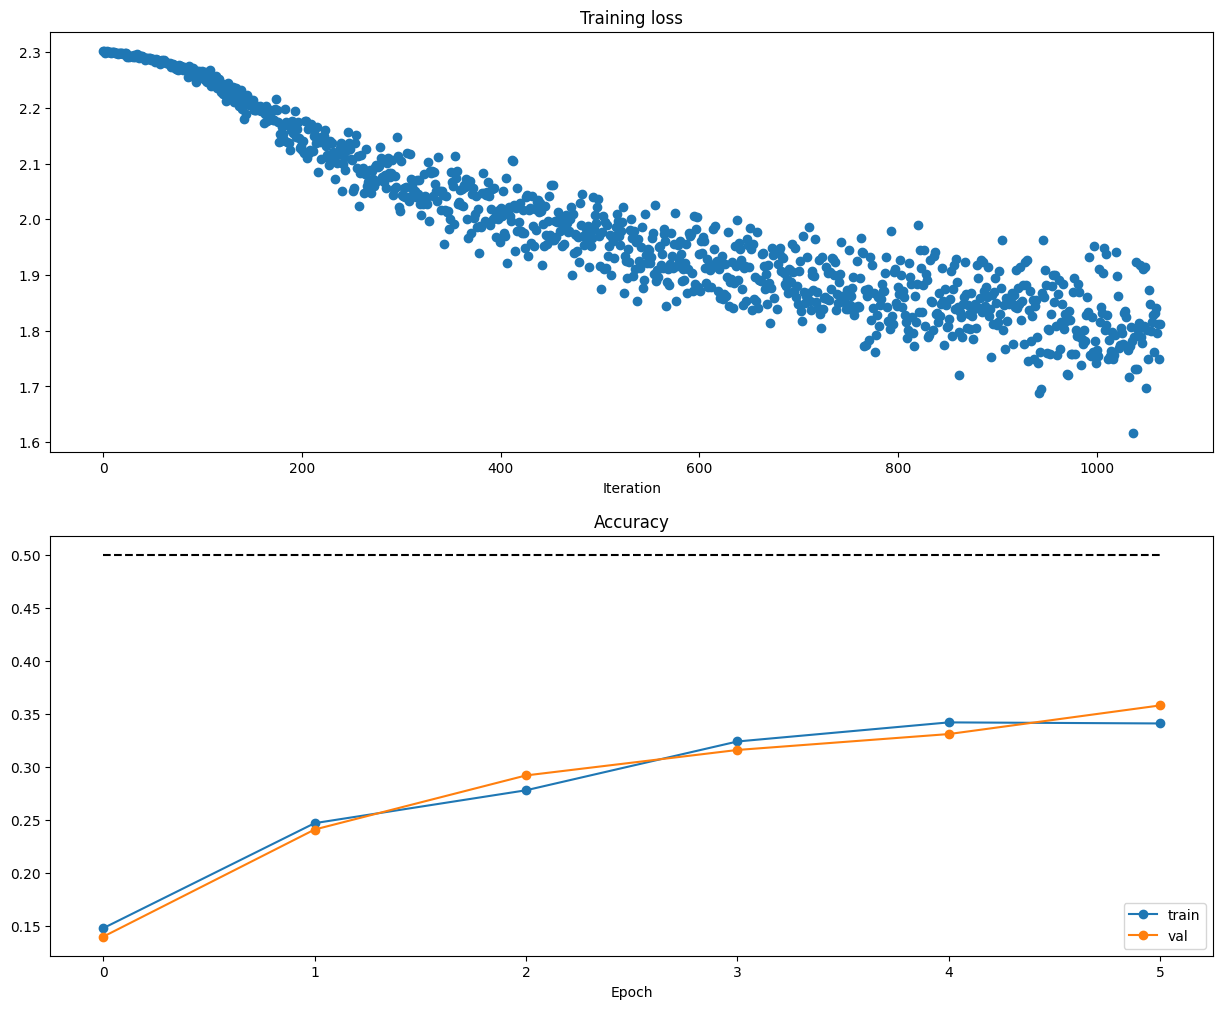

In [33]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

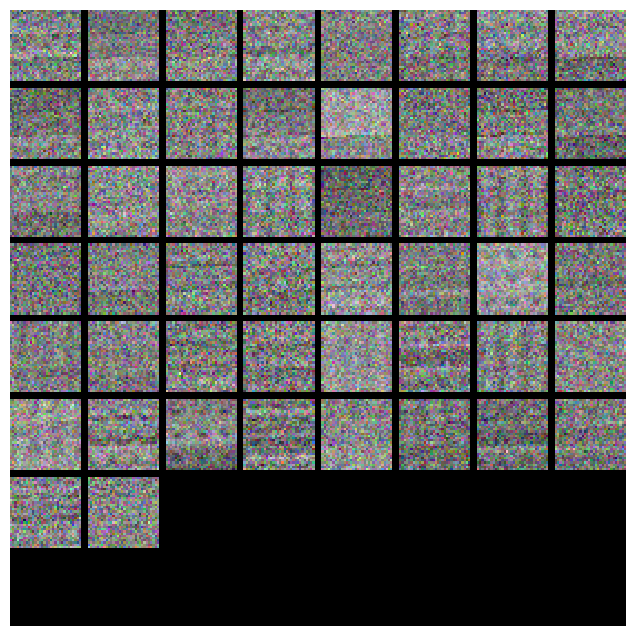

In [34]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [35]:
model = TwoLayerNet()
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################
# ****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)****

#given the min-max ranges of the hyperparameters, create random combinations of the parameters
# with a probability distribution that is uniform
def generate_random_hyperparams(lr_range, reg_range, hidden_size_range, epoch_values):
    """ Generate arbitrary hyperparameters for the number of epochs, hidden layer size, regularization intensity, and learning rate.

    Args:
    - lr_range (tuple): The learning rate exponent range, for example, (-4, -2).
    - reg_range (tuple): The regularization strength exponent range, for example, (-7, -3).
    - hidden_size_range (tuple): The range, such as (50, 200), for the size of the hidden layer.
    - epoch_values (list): A list of potential values for an epoch, such as [10, 20].

    Returns: - (float, float, int, int): A tuple with the following contents: epochs, regularization strength, hidden size, and randomly sampled learning rate
    """
    lr = 10**np.random.uniform(lr_range[0], lr_range[1])
    reg = 10**np.random.uniform(reg_range[0], reg_range[1])
    hidden_size = np.random.randint(hidden_size_range[0], hidden_size_range[1])
    epochs = np.random.choice(epoch_values)

    return lr, reg, hidden_size, epochs

# number of combinations of hyperparameters to look for
num_hyperparam_configs = 10

# form random combinations of hyperparameters
grid_search = [generate_random_hyperparams((-2, -4), (-7, -3), (50, 100, 200), (10, 20))
               for count in range(num_hyperparam_configs)]

# get our data
# data = get_CIFAR10_data()

best_val = -1
results = {}

# iterate over the generated hyperparameter configurations
for config_num, config in enumerate(grid_search):
    print("Hyperparam config #{} of #{}: ".format(config_num + 1, len(grid_search)), end='')

    lr, reg, hidden_size, epochs = config
    print("lr: {:.2e}, reg: {:.2e}, hidden_size: {}, epochs: {}".format(lr, reg, hidden_size, epochs))

    # initialize the model with the random hyperparameters
    model = TwoLayerNet(hidden_dim=hidden_size, reg=reg)
    current_solver = Solver(model, data, update_rule='sgd', optim_config={'learning_rate': lr},
                            lr_decay=0.95, num_epochs=epochs, batch_size=100,
                            print_every=100, verbose=False)

    # train amodel
    current_solver.train()

    # store the best val accuracy and the TwoLayerNet object
    if current_solver.best_val_acc > best_val:
        best_val = current_solver.best_val_acc
        solver = current_solver

    # print results
    print('Validation accuracy: %.4f' % (solver.best_val_acc,))
    print()

print('Best validation accuracy achieved: %.4f' % best_val)

# ****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)****
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Hyperparam config #1 of #10: lr: 7.18e-03, reg: 6.30e-07, hidden_size: 82, epochs: 10


/content/drive/My Drive/Coursework/ENPM703/assignment1/cs231n/layers.py:240: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(p[np.arange(num_train), y])) / num_train
/content/drive/My Drive/Coursework/ENPM703/assignment1/cs231n/layers.py:236: RuntimeWarning: overflow encountered in exp
  ex = np.exp(x)  # Compute the exponentials of the scores
/content/drive/My Drive/Coursework/ENPM703/assignment1/cs231n/layers.py:237: RuntimeWarning: invalid value encountered in divide
  p = (ex.T / np.sum(ex, axis=1)).T  # Calculate softmax probabilities


Validation accuracy: 0.1670

Hyperparam config #2 of #10: lr: 3.73e-03, reg: 2.60e-07, hidden_size: 62, epochs: 20
Validation accuracy: 0.1800

Hyperparam config #3 of #10: lr: 6.32e-03, reg: 7.76e-04, hidden_size: 78, epochs: 20
Validation accuracy: 0.2090

Hyperparam config #4 of #10: lr: 4.32e-03, reg: 1.28e-05, hidden_size: 59, epochs: 20
Validation accuracy: 0.2090

Hyperparam config #5 of #10: lr: 1.91e-03, reg: 1.61e-06, hidden_size: 98, epochs: 10
Validation accuracy: 0.5020

Hyperparam config #6 of #10: lr: 1.38e-03, reg: 5.47e-07, hidden_size: 78, epochs: 20
Validation accuracy: 0.5190

Hyperparam config #7 of #10: lr: 6.44e-04, reg: 6.45e-06, hidden_size: 52, epochs: 10
Validation accuracy: 0.5190

Hyperparam config #8 of #10: lr: 5.42e-03, reg: 3.65e-05, hidden_size: 77, epochs: 20
Validation accuracy: 0.5190

Hyperparam config #9 of #10: lr: 6.79e-03, reg: 2.51e-04, hidden_size: 50, epochs: 20
Validation accuracy: 0.5190

Hyperparam config #10 of #10: lr: 3.18e-04, reg: 4.

# Test your model!
Run your best model on the validation and test sets. You should achieve above 48% accuracy on the validation set and the test set.

In [36]:
y_val_pred = np.argmax(solver.model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())

Validation set accuracy:  0.537


In [37]:
y_test_pred = np.argmax(solver.model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.524


## Inline Question 2:

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$
The correct choices are:

Train on a larger dataset.

Increase the regularization strength.

$\color{blue}{\textit Your Explanation:}$

Training on a larger dataset: By exposing the model to a greater variety of examples and lowering overfitting, a larger training dataset improves generalization. For example, in the CIFAR dataset, more samples for each class enable the model to observe a greater range of variances, improving its ability to identify data that was not noticed during testing. But, it's crucial to make sure the extra data isn't noisy because it could interfere with the model's ability to learn.

Increasing the regularization strength: Regularization discourages the model from overfitting by penalizing overly large weights. The model is forced to rely less on "outlier" features or noisy patterns in the training data by making the model less complex. The influence can be distributed more equally across all characteristics with a greater regularization term, which will improve the model's ability to generalize to new data.

Adding more hidden units: While this can seem like a good idea, doing so can complicate the model and cause overfitting. Therefore, in most cases, this is not the ideal way to close the accuracy gap between training and testing.




